# HOG WITH DECISSION TREES 

### 1. Import library

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn import tree

In [102]:
data_train = pd.read_csv('../images/sign-dataset/sign_mnist_train.csv')
data_test = pd.read_csv('../images/sign-dataset/sign_mnist_test.csv')

In [103]:
train_images = data_train.iloc[0:27455, 1:785].values
train_labels = data_train.iloc[0:27455, 0].values

In [104]:
test_images = data_train.iloc[0:7172, 1:785].values
test_labels = data_train.iloc[0:7172, 0].values

### 2. Memasukkan dataset

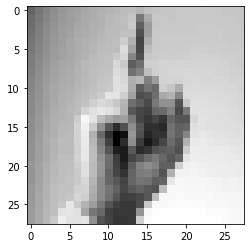

In [158]:
# visualisasi gambar pada train image
plt.imshow(train_images[0].reshape(28,28), cmap='gray')

In [159]:
train_labels[0]

3

### 3. Extract HOG Feature

* Orientations = 9, pixels_per_cell = (8, 8), cells_per_block = (2, 2), block_norm = L2
* Orientations = 7, pixels_per_cell = (8, 8), cells_per_block = (2, 2), block_norm = L2
* Orientations = 9, pixels_per_cell = (4, 4), cells_per_block = (2, 2), block_norm = L2-Hys
* Orientations = 9, pixels_per_cell = (8, 8), cells_per_block = (4, 4), block_norm = L2-Hys

In [204]:
feature, hog_img = hog(train_images[1].reshape(28,28), 
                       orientations=9, 
                       pixels_per_cell=(8,8), 
                       cells_per_block=(2,2), 
                       visualize=True, 
                       block_norm='L2')

<BarContainer object of 144 artists>

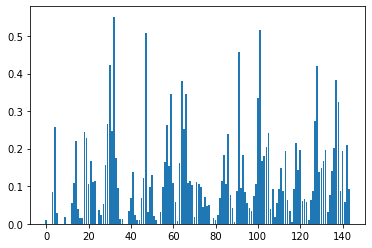

In [205]:
# menampilkan feature yang terdeteksi
plt.bar(list(range(feature.shape[0])), feature)

### 4. Pre-processing HOG image 

In [206]:
n_dims = feature.shape[0]
n_samp = train_images.shape[0]

In [207]:
x_train, y_train = datasets.make_classification(n_samples=n_samp, n_features=n_dims)

In [208]:
x_train.shape

(27455, 144)

In [209]:
# Mengambil fitur dari gambar dan dimasukkan kedalam dataset
for i in range(n_samp):
    x_train[i], _ = hog(train_images[i].reshape(28,28), 
                        orientations=9,
                        pixels_per_cell=(8, 8), 
                        cells_per_block=(2,2), 
                        visualize=True, 
                        block_norm='L2')
    y_train[i] = train_labels[i]

### 5. Konversi kategori label kedalam 'one hot label' 

In [166]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_train)
y_train_one_hot = lb.transform(y_train)

In [167]:
y_train_one_hot[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [168]:
y_train[0]

3

In [169]:
import numpy as np
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [170]:
label[0]

3

## Klasifikasi Menggunakan 'Decision Trees (DTs)'

In [171]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train_one_hot)

### 1. Prediksi Dataset percobaan

In [174]:
# Prediksi Dataset percobaan
n_samp = test_images.shape[0]
x_test, y_test = datasets.make_classification(n_samples=n_samp, n_features=n_dims)

# Mengambil fitur dari contoh gambar dan dimasukkan kedalam dataset
for i in range(n_samp):
    x_test[i], _ = hog(test_images[i].reshape(28,28), 
                       orientations=9, 
                       pixels_per_cell=(8, 8), 
                       cells_per_block=(2,2), 
                       visualize=True, 
                       block_norm='L2')
    y_test[i] = test_labels[i]

In [175]:
y_test_one_hot = lb.transform(y_test)
y_pred_one_hot = clf.predict(x_test)
y_pred = lb.inverse_transform(y_pred_one_hot)

In [176]:
y_pred[0]

3

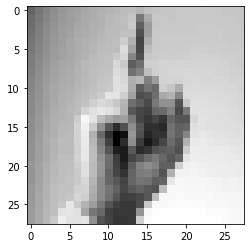

In [177]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')

In [178]:
# prediksi nilai keluaran
out_one_hot = clf.predict(x_test[0].reshape(1, n_dims))
out = lb.inverse_transform(out_one_hot)

In [179]:
out[0]

3

## Evaluasi Matriks

### 1. Confussion Matrix

In [187]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[309,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 260,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 302,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 322,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 254,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 310,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 298,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

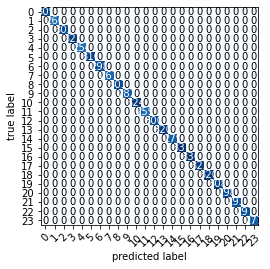

In [182]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

### 2. Preccision

In [183]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
precision

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

### 3. Recall

In [184]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
recall

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

### 4. Accuracy

In [185]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

### 5. F1 Score

In [186]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
f1

1.0